## Data collection

In [160]:
#importing necessary libraries
import numpy as np
import scipy.misc
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from skimage.transform import resize

import scipy.misc
from PIL import Image
import os
import warnings
warnings.filterwarnings("ignore")

In [161]:
#ATT Dataset

from os import listdir
from os.path import isfile, join
mypath = "orl_faces"
cropped_yale_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [162]:
#extracting images for first 10 people from ATT Dataset and image cascading

cascPath = "haarcascade_frontalface_default.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

## read the dataset
full_face_crop = []
full_labels_crop = []
labels_crop = []

for j in range(1,11):
    all_images_crop = os.listdir("orl_faces\s{}".format(j))
    #print(j)
    # cropped_yale_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    img_list_crop = [filename for filename in all_images_crop ]
    # print(all_images)
    # print(img_list)


    face1_crop = np.zeros((len(img_list_crop),80,60))
    for k,img in enumerate(img_list_crop):
        I = scipy.misc.imread(os.path.join("orl_faces\s{}".format(j),img))
        face1_crop[k,...] = resize(I,[80,60])
    full_face_crop.append(face1_crop)

# for j in range(10,20):
#     if (j != 14):
#         print(j)

#         all_images_crop = os.listdir("CroppedYale/yaleB{}".format(j))
#         # cropped_yale_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#         img_list_crop = [filename for filename in all_images_crop if filename.startswith('yaleB{}_P00A'.format(j))]
#         # print(all_images)
#         # print(img_list)

    
#         face1_crop = np.zeros((len(img_list_crop),80,60))
#         for k,img in enumerate(img_list_crop):
#             I = scipy.misc.imread(os.path.join('CroppedYale/yaleB{}'.format(j),img))
#             face1_crop[k,...] = resize(I,[80,60])
#         full_face_crop.append(face1_crop)        
        

#created full labels
for i in range(1,11):
    labels_crop = i* np.ones(10,)
    full_labels_crop.append(labels_crop)
    
# full_labels = np.stack(full_labels)
# full_face = np.stack(full_face)

In [163]:
full_face_crop = np.array(full_face_crop)
full_face_crop.shape

(10, 10, 80, 60)

In [164]:
full_labels_crop= np.array(full_labels_crop)
full_labels_crop.shape

(10, 10)

In [165]:
# combining images after random permutation

for k in range(full_face_crop.shape[0]):
    g = np.random.permutation(10)   # randomly select the 9 faces
    full_face_crop[k,...] = full_face_crop[k,g[:],...]
    full_labels_crop[k,...] = full_labels_crop[k,g[:]]


full_face_crop = np.reshape(full_face_crop,[-1,80,60])
full_labels_crop = np.reshape(full_labels_crop,[-1,])

In [166]:
full_face_att= full_face_crop
full_labels_att= full_labels_crop

In [167]:
full_face_att.shape

(100, 80, 60)

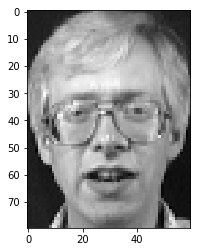

In [168]:
plt.imshow(full_face_crop[10],  cmap=plt.cm.gray)

In [169]:
## Yales faces dataset and image cascading
full_face = []
full_labels = []
all_images = os.listdir('yalefaces')
for j in range(1,11):    # there are 15 different people in the dataset
    img_list = [filename for filename in all_images if filename.startswith('subject%.2d'%j)]
#     img_list = glob.glob('yalefaces/subject%.2d*'%j)
    face1 = np.zeros((len(img_list),80,60))
    for k,img in enumerate(img_list):
        I = scipy.misc.imread(os.path.join('yalefaces',img))
        faces = faceCascade.detectMultiScale(
            I,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30))
        x,y,h,w = faces[0]
        face1[k,...] = zoom(I[y:y+h,x:x+w],[80./h,60./w])
    labels = (j+10)*np.ones((11,))
    full_face.append(face1)
    full_labels.append(labels)
full_face = np.stack(full_face)    # contains the images of all faces
full_labels = np.stack(full_labels)   # contains the ID of all the faces

In [170]:
## Random permuation of yales data 
for k in range(full_face.shape[0]):
    g = np.random.permutation(11)   
    full_face[k,...] = full_face[k,g[:],...]
    full_labels[k,...] = full_labels[k,g[:]]
    
full_face = np.reshape(full_face,[-1,80,60])
full_labels = np.reshape(full_labels,[-1,])

In [171]:
full_face_yales= full_face
full_labels_yales= full_labels

In [172]:
print(full_face_yales.shape)
print(full_labels_yales.shape)

(110, 80, 60)
(110,)


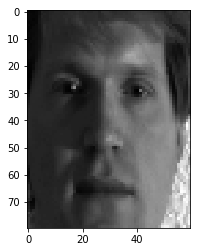

In [173]:
#example of image
plt.imshow(full_face_yales[10],  cmap=plt.cm.gray)

In [174]:
#Caltech dataset 
from os import listdir
from os.path import isfile, join
mypath = "faces_grey_sub"
faces_rgb_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [175]:
#taking images for first 10 people and casacading image
cascPath = "haarcascade_frontalface_default.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

## read the dataset
full_face = []
full_labels = []
labels = []

for j in range(1,11):
    all_images = os.listdir("faces_grey_sub/subject{}".format(j))
    # cropped_yale_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    img_list = [filename for filename in all_images ]
    # print(all_images)
    # print(img_list)


    face1 = np.zeros((len(img_list),80,60))
    for k,img in enumerate(img_list):
        I = scipy.misc.imread(os.path.join('faces_grey_sub/subject{}'.format(j),img))
        faces = faceCascade.detectMultiScale(
            I,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30))
        if len(faces) == 0:
            face1[k,...] = resize(I,[80,60])
            
        else :
            x,y,h,w = faces[0]
            face1[k,...] = zoom(I[y:y+h,x:x+w],[80./h,60./w])
    
    full_face.append(face1)

    labels = (j+20)* np.ones(len(img_list),)
    full_labels.append(labels)


In [176]:
full_labels = np.array(full_labels)
full_face = np.array(full_face)
#full_face

In [177]:
#forming an stack of images (different number of faces for each person)
full_face_arr2=[]
#full_face_arr = np.array(full_face_arr)
#full_face_arr = np.zeros((80,60))
for i in range(len(full_face)):
    for j in range(len(full_face[i])):
        #full_face_arr= np.concatenate((full_face_arr, full_face[i]), axis=0)
        full_face_arr2.append(full_face[i][j])

In [178]:
full_face_arr2= np.array(full_face_arr2)

In [179]:
#forming a stack of labels(different number of faces for each person)
full_labels_arr2=[]
full_labels_arr2 = np.array(full_labels_arr2)
for i in range(len(full_labels)):
    full_labels_arr2= np.concatenate((full_labels_arr2, full_labels[i]), axis=0)

In [180]:
full_face_cal= full_face_arr2
full_labels_cal= full_labels_arr2

In [181]:
full_face_cal.shape

(165, 80, 60)

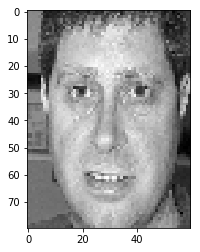

In [182]:
plt.imshow(full_face_cal[10],  cmap=plt.cm.gray)

In [183]:
#ufi-cropped dataset 
from os import listdir
from os.path import isfile, join
mypath = "ufi-cropped/train"
cropped_yale_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [184]:
# taking images for first 10 persons and performing image cascading (reshape in case already cropped)
cascPath = "haarcascade_frontalface_default.xml"

# Create the haar cascade
faceCascade = cv2.CascadeClassifier(cascPath)

## read the dataset
full_face_ufi = []
full_labels_ufi = []
labels = []

for j in range(1,11):
    all_images = os.listdir("ufi-cropped/train/s{}".format(j))
    # cropped_yale_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    img_list = [filename for filename in all_images ]
    # print(all_images)
    # print(img_list)


    face1 = np.zeros((len(img_list),80,60))
    for k,img in enumerate(img_list):
        I = scipy.misc.imread(os.path.join('ufi-cropped/train/s{}'.format(j),img))
        faces = faceCascade.detectMultiScale(
            I,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30))
        if len(faces) == 0:
            face1[k,...] = resize(I,[80,60])
            
        else :
            x,y,h,w = faces[0]
            face1[k,...] = zoom(I[y:y+h,x:x+w],[80./h,60./w])
    
    full_face_ufi.append(face1)

    labels = (j+27)* np.ones(len(img_list),)
    full_labels_ufi.append(labels)
#     print(img_list)    
    
# full_labels = np.stack(full_labels)
# full_face = np.stack(full_face)

In [185]:
full_face_ufi = np.array(full_face_ufi)
full_face_ufi.shape

(10,)

In [186]:
full_labels_ufi= np.array(full_labels_ufi)
full_labels_ufi.shape

(10,)

In [187]:
full_face_ufi2=[]
#full_face_arr = np.array(full_face_arr)
#full_face_arr = np.zeros((80,60))
for i in range(len(full_face_ufi)):
    for j in range(len(full_face_ufi[i])):
        #full_face_arr= np.concatenate((full_face_arr, full_face[i]), axis=0)
        full_face_ufi2.append(full_face_ufi[i][j])

In [188]:
full_face_ufi= np.array(full_face_ufi2)

In [189]:
full_face_ufi.shape

(83, 80, 60)

In [190]:
full_labels_ufi2=[]
full_labels_ufi2 = np.array(full_labels_ufi2)
for i in range(len(full_labels_ufi)):
    full_labels_ufi2= np.concatenate((full_labels_ufi2, full_labels_ufi[i]), axis=0)

In [191]:
full_labels_ufi= np.array(full_labels_ufi2)

In [192]:
full_labels_ufi.shape

(83,)

In [193]:
#concatenating datasets

In [194]:
full_face_arr= np.concatenate((full_face_att, full_face_yales, full_face_cal, full_face_ufi), axis=0)

In [195]:
full_labels_arr = np.concatenate((full_labels_att, full_labels_yales, full_labels_cal, full_labels_ufi), axis=0)

In [196]:
full_labels_arr.shape

(458,)

In [197]:
full_face_arr.shape

(458, 80, 60)

## Image Preprocessing

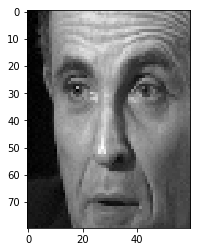

In [198]:
#image normalization 

full_face_arr1=[]
for i in range(len(full_face_arr)):
    full_face_arr1.append(np.uint8(cv2.normalize(full_face_arr[i], None, 0, 255, cv2.NORM_MINMAX)))
plt.imshow((full_face_arr1[444]),  cmap=plt.cm.gray)

full_face_arr= np.array(full_face_arr1)

In [199]:

# from skimage import filters
# from skimage.filters import threshold_otsu
# # Otsu thresholding
# for i in range(len(full_face_arr)):
#     threshold = threshold_otsu(full_face_arr[i])
#     th3 = full_face_arr[i]> threshold
#     full_face_arr[i]= th3
# plt.imshow((full_face_arr[444]),  cmap=plt.cm.gray)

In [200]:
# #dilation

# from skimage.morphology import erosion, dilation
# kernel = np.ones((1,1), np.uint8)

# for i in range(len(full_face_arr)):
#     full_face_arr[i] = dilation(full_face_arr[i], kernel)
    
# plt.imshow((full_face_arr[444]),  cmap=plt.cm.gray)

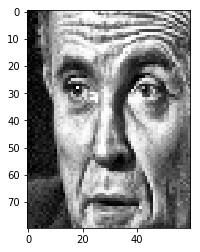

In [201]:
#CLAHE preprocessing

full_face_arr1=[]
clahe= cv2.createCLAHE(clipLimit=2.0, tileGridSize = (8,8))
for i in range(len(full_face_arr)):
    full_face_arr1.append(clahe.apply(full_face_arr[i]))
    
plt.imshow(cv2.equalizeHist(full_face_arr1[444]),  cmap=plt.cm.gray)

full_face_arr= np.array(full_face_arr1)

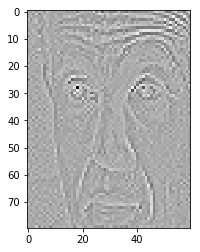

In [202]:
#Laplcian

import cv2
full_face_arr1=[]
for img in full_face_arr:
    full_face_arr1.append(cv2.Laplacian(img,cv2.CV_64F))
plt.imshow((full_face_arr1[444]),  cmap=plt.cm.gray)

full_face_arr= np.array(full_face_arr1)

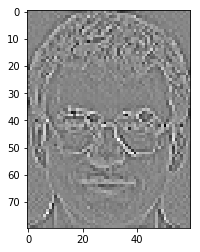

In [203]:
plt.imshow(full_face_arr[55],  cmap=plt.cm.gray)

## Feature extraction

In [204]:
#KAZE Feature extraction

# import cv2
# import numpy as np
# import scipy
# from scipy.misc import imread
# #import cPickle as pickle
# import random
# import os
# import matplotlib.pyplot as plt

# # Feature extractor
# def extract_features(full_face_arr, vector_size=32):
#     arr=[]
#     k=0
#     for image in full_face_arr:
#         try:
#             # Using KAZE, cause SIFT, ORB and other was moved to additional module
#             # which is adding addtional pain during install
#             alg = cv2.KAZE_create()
            
#             image=image.astype(np.uint8)
#             # Dinding image keypoints
#             kps, dsc = alg.detectAndCompute(image, None)
            
#             if dsc is None:
#                 arr.append(np.zeros(vector_size * 64))
#             else:
#                 # Getting first 32 of them. 
#                 # Number of keypoints is varies depend on image size and color pallet
#                 # Sorting them based on keypoint response value(bigger is better)
#                 kps = sorted(kps, key=lambda x: -x.response)[:vector_size]

#                 # computing descriptors vector
#                 #kps, dsc = alg.compute(image, kps)

#                 # Flatten all of them in one big vector - our feature vector
#                 dsc = dsc.flatten()

#                 # Making descriptor of same size
#                 # Descriptor vector size is 64
#                 needed_size = (vector_size * 64)
#                 if dsc.size < needed_size:
#                     # if we have less the 32 descriptors then just adding zeros at the
#                     # end of our feature vector
#                     dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
#                 #dsc= np.array(dsc)
#                 #print(dsc)
#                 arr.append(dsc)
#             k=k+1
#         except cv2.error as e:
#             print ('Error: ', e)

#     return arr



In [205]:
#train test split
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(full_face_arr, full_labels_arr, stratify= full_labels_arr)

In [206]:
#LBFH 

from skimage.feature import local_binary_pattern
# train_set = np.reshape(train_set,[-1,80,60])
# train_labels = np.reshape(train_labels,[-1,])
# test_set = np.reshape(test_set,[-1,80,60])
# test_labels = np.reshape(test_labels,[-1,])
train_feat = np.zeros_like(train_set)
test_feat = np.zeros_like(test_set)

for k in range(train_feat.shape[0]):
        train_feat[k,...] = local_binary_pattern(train_set[k,...],8,3)#,method='uniform')
for k in range(test_feat.shape[0]):
        test_feat[k,...] = local_binary_pattern(test_set[k,...],8,3)#,method='uniform')
print(np.amax(test_feat))

255.0


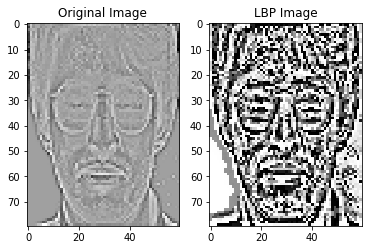

In [207]:
## visualize an original image and an LBP image
idx= 60
plt.subplot(121)
plt.title('Original Image')
plt.imshow(train_set[idx,...],cmap='Greys_r')

plt.subplot(122)
plt.title('LBP Image')
plt.imshow(train_feat[idx,...],cmap='Greys_r')
plt.show()

In [208]:
# set the number of grids in x and y direction
# divide the image into the specified number of grids
# for each grid compute the histogram with 64 bins
# concatenate the histogram from all grid regions to form a single feature
# now we have one feature vector per image
# Note that grid size and histogram bin sizes are variable
x_grid = 7
y_grid = 7
grid_size_x = train_feat.shape[1]//x_grid
grid_size_y = train_feat.shape[2]//y_grid
for k in range(train_feat.shape[0]):
    for x in range(x_grid):
        for y in range(y_grid):
            patch = train_feat[k,x*grid_size_x:(x+1)*grid_size_x,y*grid_size_y:(y+1)*grid_size_y]
            hist,_ = np.histogram(patch.reshape(-1),bins=64)
            if x==0 and y==0:
                patch_hist_list = hist
            else:
                patch_hist_list = np.concatenate([patch_hist_list,hist],0)
    if k==0:
        data_hist = patch_hist_list[np.newaxis,...]
    else:
        data_hist = np.concatenate([data_hist,patch_hist_list[np.newaxis,...]],0)
print(data_hist.shape)

grid_size_x = test_feat.shape[1]//x_grid
grid_size_y = test_feat.shape[2]//y_grid

for k in range(test_feat.shape[0]):
    for x in range(x_grid):
        for y in range(y_grid):
            patch = test_feat[k,x*grid_size_x:(x+1)*grid_size_x,y*grid_size_y:(y+1)*grid_size_y]
            hist,_ = np.histogram(patch.reshape(-1),bins=64)
            if x==0 and y==0:
                patch_hist_list = hist
            else:
                patch_hist_list = np.concatenate([patch_hist_list,hist],0)
    if k==0:
        test_data_hist = patch_hist_list[np.newaxis,...]
    else:
        test_data_hist = np.concatenate([test_data_hist,patch_hist_list[np.newaxis,...]],0)
print(test_data_hist.shape)

(343, 3136)
(115, 3136)


In [209]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
train_feat = data_hist
test_feat = test_data_hist
print(train_feat.shape,test_feat.shape)
pca.fit(train_feat)

(343, 3136) (115, 3136)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [210]:
# select number of components which explain 99% of the data variance
n_components = np.argmin(np.cumsum(pca.explained_variance_ratio_)<=0.99)
print(n_components)
train_feat_pca = pca.transform(train_feat)
train_feat_pca = train_feat_pca[:,:n_components]
test_feat_pca = pca.transform(test_feat)
test_feat_pca = test_feat_pca[:,:n_components]
print(train_feat_pca.shape)

326
(343, 326)


In [211]:
#hog features
# train_set = np.reshape(train_set,[train_set.shape[0],4800])
# test_set =  np.reshape(test_set,[test_set.shape[0],4800])
# data_hist= train_set
# test_data_hist= test_set

In [212]:
# from skimage.feature import hog,corner_fast
# #features_nums = faces.data.reshape(-1,62,47)
# hog_features = [hog(full_face_arr[n,:,:],pixels_per_cell=(7,7)) for n in range(full_face_arr.shape[0])]
# hog_features = np.stack(hog_features,0)
# print(hog_features.shape)

In [213]:
# from sklearn.model_selection import train_test_split
# train_set, test_set, train_labels, test_labels = train_test_split(hog_features, full_labels_arr, stratify= full_labels_arr)

In [214]:
# from sklearn.decomposition import PCA
# pca = PCA(whiten=True)
# train_feat = train_set
# test_feat = test_set
# print(train_feat.shape,test_feat.shape)
# pca.fit(train_feat)

In [215]:
#forming training pairs
import itertools
img_pair = []
#img_full_pair = []
label_pair = []
for pair in itertools.combinations_with_replacement(range(train_feat_pca.shape[0]),2):
    img_pair.append(train_feat_pca[pair,:])
    #img_full_pair.append(train_set[pair,:])
    label_pair.append(train_labels[pair,])
img_pair = np.stack(img_pair)
#img_full_pair = np.stack(img_full_pair)
label_pair = np.stack(label_pair)
label_pair = (label_pair[:,0] == label_pair[:,1])
label_pair = label_pair*1

In [216]:
#forming test pairs
test_img_pair = []
test_label_pair = []
for pair in itertools.combinations_with_replacement(range(test_feat.shape[0]),2):
    test_img_pair.append(test_feat_pca[pair,...])
    test_label_pair.append(test_labels[pair,])
test_img_pair = np.stack(test_img_pair)
test_label_pair = np.stack(test_label_pair)
test_label_pair = (test_label_pair[:,0] == test_label_pair[:,1])
test_label_pair = test_label_pair*1

In [217]:
#count of classes
np.bincount(label_pair)

array([56948,  2048], dtype=int64)

In [218]:
#getting trainable features
img_pair1 = np.abs(img_pair[:,0,...] - img_pair[:,1,...])
test_img_pair1 = np.abs(test_img_pair[:,0,...] - test_img_pair[:,1,...])

In [219]:
# SMOTE upsampling

# import pandas as pd
# img_pair1_df= pd.DataFrame(img_pair1)
# label_pair_df= pd.DataFrame(label_pair)

In [220]:

# from imblearn.over_sampling import SMOTE, ADASYN
# from imblearn.under_sampling import CondensedNearestNeighbour, InstanceHardnessThreshold
# from imblearn.combine import SMOTETomek
# sm =  SMOTETomek()
# img_pair1, label_pair = sm.fit_sample(img_pair1_df, label_pair_df)

In [221]:
# normal upsample

# label_pair_df.columns =['output']
# label_pair_df.head()

In [222]:
# df_upsample= pd.concat([img_pair1_df , label_pair_df], axis=1)
# df_upsample.head()

In [223]:
# ## upsampling

# #resample function
# from sklearn.utils import resample
# # Separate majority and minority classes
# df_majority = df_upsample[df_upsample.output==0]
# df_minority = df_upsample[df_upsample.output==1]
 
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples= 53031,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled.output.value_counts()

In [224]:
# ## upsampling

# #resample function
# from sklearn.utils import resample
# # Separate majority and minority classes
# df_majority = df_upsample[df_upsample.output==0]
# df_minority = df_upsample[df_upsample.output==1]
 
# # Upsample minority class
# df_minority_upsampled = resample(df_majority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples= 20000,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_minority_upsampled, df_minority])
 
# # Display new class counts
# df_upsampled.output.value_counts()

In [225]:
# np.shape(df_upsampled)

In [226]:
# img_pair1= df_upsampled.drop('output', axis=1)
# label_pair= df_upsampled['output']

In [227]:
img_pair1= np.array(img_pair1)
label_pair =np.array(label_pair)

In [228]:
img_pair1.shape

(58996, 326)

In [229]:
np.bincount(label_pair)

array([56948,  2048], dtype=int64)

## Training and evaluation curves

In [230]:
# shuffle the training data
g = np.random.permutation(img_pair1.shape[0])
img_pair1 = img_pair1[g,:]
label_pair = label_pair[g,]

#initializing model
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
#from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.neural_network import MLPClassifier
clf = RandomForestClassifier(n_estimators= 50,random_state=1, n_jobs=-1 , min_samples_leaf=1)

In [231]:
clf.fit(img_pair1,label_pair)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [232]:
print(clf.score(img_pair1, label_pair))

0.9997287951725541


In [233]:
print(clf.score(test_img_pair1, test_label_pair))

0.9755622188905547


In [234]:
pred = clf.predict_proba(test_img_pair1)
from sklearn.metrics import f1_score
print(f1_score(clf.predict(test_img_pair1),test_label_pair))

0.5852417302798981


Number of thresholds evaluated:  24


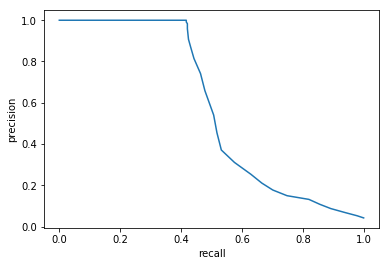

In [235]:
# plot the precision-recall curve

from sklearn.metrics import auc,precision_recall_curve
precision,recall,thr = precision_recall_curve(test_label_pair, pred[:,1], pos_label=1)
print('Number of thresholds evaluated: ',len(thr))
plt.plot(recall,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [236]:
f1_score = (2*precision*recall)/(precision+recall)
print('max f1-score:',np.amax(f1_score))
pr_auc = auc(recall,precision)
print('Area under Precision Recall Curve: ',pr_auc)

max f1-score: 0.5894206549118388
Area under Precision Recall Curve:  0.5728312113456362


In [237]:
pred1 = clf.predict(test_img_pair1)

In [238]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(test_label_pair, pred1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6392
           1       1.00      0.41      0.59       278

   micro avg       0.98      0.98      0.98      6670
   macro avg       0.99      0.71      0.79      6670
weighted avg       0.98      0.98      0.97      6670



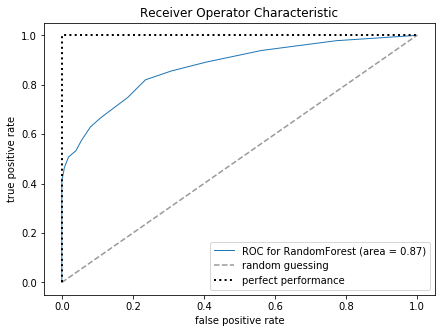

In [239]:
#ROC Curve

from sklearn.metrics import roc_curve, auc
from scipy import interp 

fig = plt.figure(figsize=(7, 5)) 
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100) 
all_tpr = []


fpr,  tpr, thresholds = roc_curve(test_label_pair,  pred[:, 1], pos_label=1) 
mean_tpr += interp(mean_fpr, fpr, tpr)
mean_tpr[0] = 0.0


# Receiver Operating Characteristic - Area Under the Curve
roc_auc = auc(fpr, tpr) 
plt.plot(fpr, tpr, lw=1, label='ROC for RandomForest (area = %0.2f)' % (roc_auc)) 

plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing') 

#mean_tpr /= len(models)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) # Mean Area Under the Curve

# Plots
#plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2) 
plt.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='perfect performance') 
plt.xlim([-0.05, 1.05]) 
plt.ylim([-0.05, 1.05]) 
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic') 
plt.legend(loc="lower right")
plt.show()


## Kaggle test dataset

In [240]:
#importing file
import h5py    
import numpy as np    
f = h5py.File('test.h5','r+')   

In [241]:
#getting keys
keys =list(f.keys())

In [242]:
#getting images 
images_test=[]
for key in keys:
    images_test.append(np.array(f[key]))

In [243]:
#saving test dataset
from scipy.misc import imsave
for k, key in enumerate(keys):
    imsave('./Test Data/{0}.jpg'.format(key), images_test[k])

In [244]:
#cascading images 
from skimage.transform import resize

full_face_test = []
all_images_test = os.listdir('Test data')
img_list_test = [filename for filename in all_images_test]
face1_test = np.zeros((len(img_list_test),80,60))

for k,img in enumerate(img_list_test):
        I1 = scipy.misc.imread(os.path.join('Test Data', img))
        #plt.imshow(I1 ,cmap='Greys_r')
        faces = faceCascade.detectMultiScale(
            I1,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30))
        if len(faces)==0:
            face1_test[k,...] = resize(I1 ,[80,60])
        else:
            x,y,h,w = faces[0]
            face1_test[k,...] = zoom(I1[y:y+h,x:x+w],[80./h,60./w])
        #labels = (j-1)*np.ones((11,))
full_face_test = (face1_test)
        #full_labels.append(labels)
#full_face = np.stack(full_face)    # contains the images of all faces
#full_labels = np.stack(full_labels)   # contains the ID of all the faces

### Preprocessing

In [245]:
full_face_test= np.array(full_face_test)

In [246]:
# from skimage import filters
# from skimage.filters import threshold_otsu
# # Otsu thresholding
# for i in range(len(full_face_test)):
#     threshold = threshold_otsu(full_face_test[i])
#     th3 = full_face_test[i]> threshold
#     full_face_test[i]= th3
    

In [247]:
# from skimage.morphology import erosion, dilation
# kernel = np.ones((1,1), np.uint8)

# for i in range(len(full_face_test)):
#     full_face_test[i] = dilation(full_face_test[i], kernel)

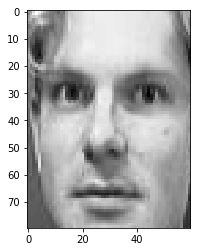

In [248]:
plt.imshow(full_face_test[5], cmap=plt.cm.gray)

In [249]:
full_face_test.shape

(120, 80, 60)

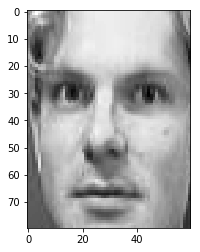

In [250]:
#normalization 
full_face_test1= []
for i in range(len(full_face_test)):
    full_face_test1.append(np.uint8(cv2.normalize(full_face_test[i], None, 0, 255, cv2.NORM_MINMAX)))

plt.imshow(full_face_test1[5], cmap=plt.cm.gray)

full_face_test= np.array(full_face_test1)

In [251]:
# clahe= cv2.createCLAHE(clipLimit=2.0, tileGridSize = (8,8))
# full_face_test1= []
# for i in range(len(full_face_test)):
#     full_face_test1.append(clahe.apply(full_face_test[i]))
  
# plt.imshow(full_face_test1[4], cmap=plt.cm.gray)
# full_face_test= np.array(full_face_test1)  

In [252]:
# import cv2
# full_face_test1= []
# for img in full_face_test:
#     full_face_test1.append(cv2.Laplacian(img,cv2.CV_64F))
    
# plt.imshow(full_face_test1[4], cmap=plt.cm.gray)
# full_face_test= np.array(full_face_test1) 

In [253]:
#KAZE

# import cv2
# import numpy as np
# import scipy
# from scipy.misc import imread
# #import cPickle as pickle
# import random
# import os
# import matplotlib.pyplot as plt

# # Feature extractor
# def extract_features(full_face_test, vector_size=32):
#     arr=[]
#     k=0
#     for image in full_face_test:
#         try:
#             # Using KAZE, cause SIFT, ORB and other was moved to additional module
#             # which is adding addtional pain during install
#             alg = cv2.KAZE_create()
            
#             image=image.astype(np.uint8)
#             # Dinding image keypoints
#             kps, dsc = alg.detectAndCompute(image, None)
            
#             if dsc is None:
#                 arr.append(np.zeros(vector_size * 64))
#             else:
#                 # Getting first 32 of them. 
#                 # Number of keypoints is varies depend on image size and color pallet
#                 # Sorting them based on keypoint response value(bigger is better)
#                 kps = sorted(kps, key=lambda x: -x.response)[:vector_size]

#                 # computing descriptors vector
#                 #kps, dsc = alg.compute(image, kps)

#                 # Flatten all of them in one big vector - our feature vector
#                 dsc = dsc.flatten()

#                 # Making descriptor of same size
#                 # Descriptor vector size is 64
#                 needed_size = (vector_size * 64)
#                 if dsc.size < needed_size:
#                     # if we have less the 32 descriptors then just adding zeros at the
#                     # end of our feature vector
#                     dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
#                 #dsc= np.array(dsc)
#                 #print(dsc)
#                 arr.append(dsc)
#             k=k+1
#         except cv2.error as e:
#             print ('Error: ', e)

#     return arr


# def batch_extractor(images_path, pickled_db_path="features.pck"):
#     files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

#     result = {}
#     for f in files:
#         print 'Extracting features from image %s' % f
#         name = f.split('/')[-1].lower()
#         result[name] = extract_features(f)
    
#     # saving all our feature vectors in pickled file
#     with open(pickled_db_path, 'w') as fp:
# pickle.dump(result, fp)

In [254]:
# arr1= extract_features(full_face_test, vector_size=48)

In [255]:
# arr1= np.array(arr1)
# arr1.shape

In [256]:
# full_face_test= arr1

In [257]:
test_feat_test_new = np.zeros_like(full_face_test)

for k in range(len(full_face_test)):
        test_feat_test_new[k,...] = local_binary_pattern(full_face_test[k,...],8,3)#,method='uniform')
print(np.amax(test_feat_test_new))

255


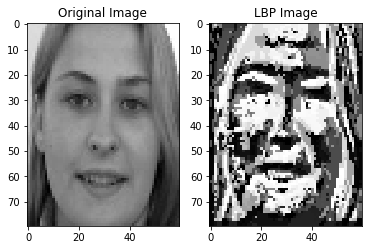

In [258]:
idx= 90
plt.subplot(121)
plt.title('Original Image')
plt.imshow(full_face_test[idx,...],cmap='Greys_r')

plt.subplot(122)
plt.title('LBP Image')
plt.imshow(test_feat_test_new[idx,...],cmap='Greys_r')
plt.show()

In [259]:
grid_size_x = test_feat_test_new.shape[1]//x_grid
grid_size_y = test_feat_test_new.shape[2]//y_grid

for k in range(test_feat_test_new.shape[0]):
    for x in range(x_grid):
        for y in range(y_grid):
            patch = test_feat_test_new[k,x*grid_size_x:(x+1)*grid_size_x,y*grid_size_y:(y+1)*grid_size_y]
            hist,_ = np.histogram(patch.reshape(-1),bins=64)
            if x==0 and y==0:
                patch_hist_list = hist
            else:
                patch_hist_list = np.concatenate([patch_hist_list,hist],0)
    if k==0:
        test_data_hist_test = patch_hist_list[np.newaxis,...]
    else:
        test_data_hist_test = np.concatenate([test_data_hist_test,patch_hist_list[np.newaxis,...]],0)
print(test_data_hist_test.shape)

(120, 3136)


In [260]:
#test_data_hist_test= full_face_test

In [261]:
#test_data_hist_test =  np.reshape(full_face_test,[120,4800])

In [262]:
from sklearn.decomposition import PCA
#pca = PCA(whiten=True)
#train_feat = data_hist
test_feat_test = test_data_hist_test

test_feat_pca_test = pca.transform(test_feat_test)
test_feat_pca_test = test_feat_pca_test[:,:n_components]
print(test_feat_pca_test.shape)

(120, 326)


In [263]:
test_img_pair_test= test_feat_pca_test

In [264]:
#hog features

# from skimage.feature import hog,corner_fast
# #features_nums = faces.data.reshape(-1,62,47)
# hog_features = [hog(full_face_test[n,:,:],pixels_per_cell=(7,7)) for n in range(full_face_test.shape[0])]
# hog_features = np.stack(hog_features,0)
# print(hog_features.shape)

In [265]:
# from sklearn.decomposition import PCA
# #pca = PCA(whiten=True)
# #train_feat = data_hist
# test_feat_test = hog_features

# test_feat_pca_test = pca.transform(test_feat_test)
# test_feat_pca_test = test_feat_pca_test[:,:n_components]
# print(test_feat_pca_test.shape)

In [266]:
import pandas as pd
data= pd.read_csv('image_pairs.csv')
true= pd.read_csv('True.csv', header= None)

In [267]:
img_pair_test=[]
img_full_pair_test=[]
for i in range(len(data)):
    a = keys.index(str(data['pair1'][i]))
    b = keys.index(str(data['pair2'][i]))
    pair= (a,b)
    #keys.index("bar")
    img_full_pair_test.append(full_face_test[pair,:])
    img_pair_test.append(test_feat_pca_test[pair,:])
test_img_pair_test = np.stack(img_pair_test)
test_full_img_pair_test= np.stack(img_full_pair_test)

In [268]:
(test_img_pair_test.shape)

(3540, 2, 326)

In [269]:
test_full_img_pair_test.shape

(3540, 2, 80, 60)

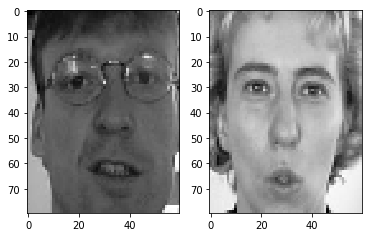

In [270]:
idx=5
img_pair_true = test_full_img_pair_test[idx,:]
#print('positive pair with label: ',label_pair[idx])
plt.subplot(121)
plt.imshow(img_pair_true[0,...].reshape(80,60),cmap='Greys_r')
plt.subplot(122)
plt.imshow(img_pair_true[1,...].reshape(80,60),cmap='Greys_r')
plt.show()

In [271]:
test_img_pair_test = np.abs(test_img_pair_test[:,0,...] - test_img_pair_test[:,1,...])

In [272]:
test_img_pair_test.shape

(3540, 326)

## Prediction 

In [273]:
#prediction 
y_pred = clf.predict(test_img_pair_test)

In [274]:
#exporting to csv format 
pred_df= pd.DataFrame(y_pred)
pred_df.to_csv('Predicted values.csv')